In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
df = pd.read_csv("data/Final.csv")


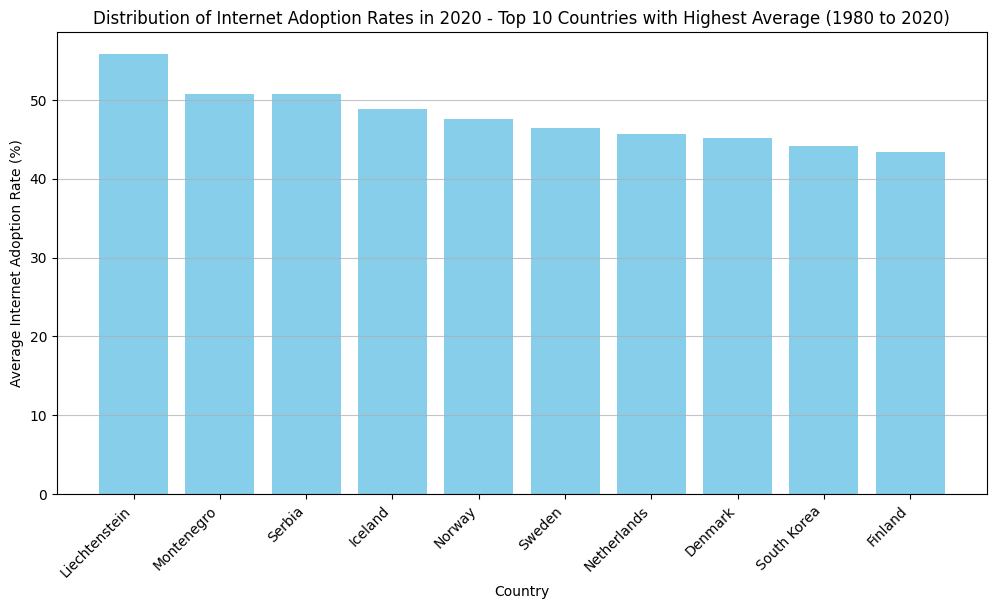

In [2]:
df_avg = df[df["Year"].between(1980, 2020)]

avg_internet_adoption = df_avg.groupby("Entity")["Internet Users(%)"].mean().reset_index()

top_10_countries_avg = avg_internet_adoption.nlargest(10, "Internet Users(%)")

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries_avg["Entity"], top_10_countries_avg["Internet Users(%)"], color='skyblue')
plt.title('Distribution of Internet Adoption Rates in 2020 - Top 10 Countries with Highest Average (1980 to 2020)')
plt.xlabel('Country')
plt.ylabel('Average Internet Adoption Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

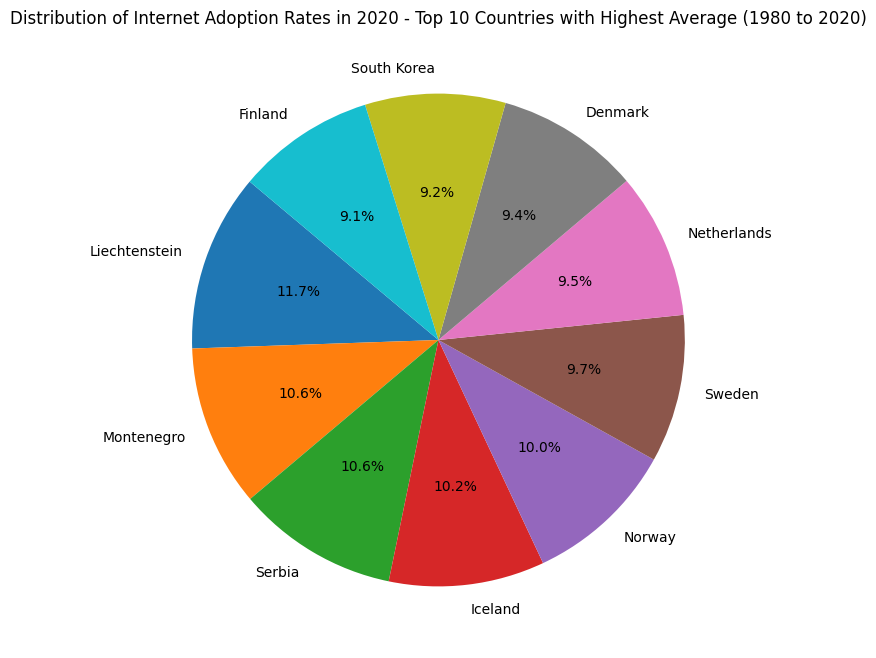

In [3]:
df = df[(df["Entity"] != "World") & (df["Entity"] != "North America")]

df_avg = df[df["Year"].between(1980, 2020)]

avg_internet_adoption = df_avg.groupby("Entity")["Internet Users(%)"].mean().reset_index()

top_10_countries_avg = avg_internet_adoption.nlargest(10, "Internet Users(%)")

plt.figure(figsize=(8, 8))
plt.pie(top_10_countries_avg["Internet Users(%)"], labels=top_10_countries_avg["Entity"], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Internet Adoption Rates in 2020 - Top 10 Countries with Highest Average (1980 to 2020)')
plt.show()

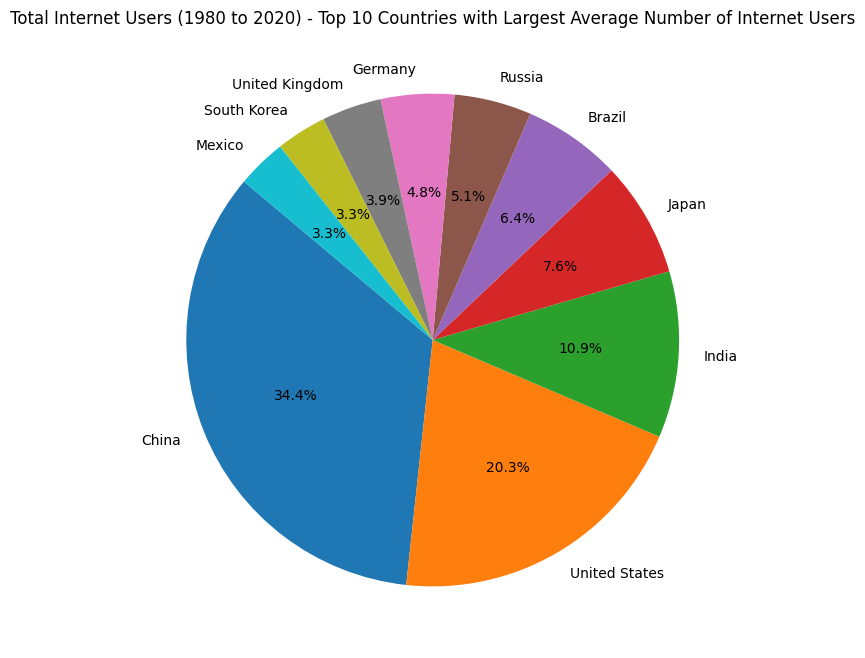

In [4]:
df = df[(df["Entity"] != "World") & (df["Entity"] != "North America")]

df_avg = df[df["Year"].between(1980, 2020)]

avg_internet_users = df_avg.groupby("Entity")["No. of Internet Users"].mean().reset_index()

top_10_countries_avg = avg_internet_users.nlargest(10, "No. of Internet Users")

plt.figure(figsize=(8, 8))
plt.pie(top_10_countries_avg["No. of Internet Users"], labels=top_10_countries_avg["Entity"], autopct='%1.1f%%', startangle=140)
plt.title('Total Internet Users (1980 to 2020) - Top 10 Countries with Largest Average Number of Internet Users')
plt.show()

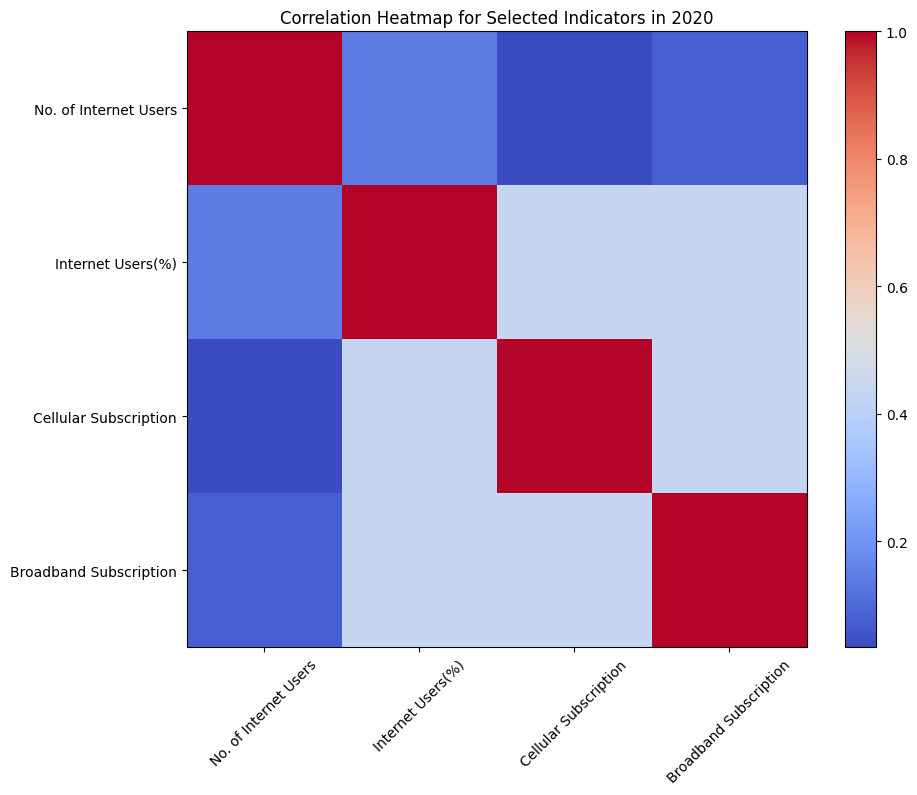

In [5]:
df_2020 = df[df["Year"] == 2020]
selected_columns = ["No. of Internet Users", "Internet Users(%)", "Cellular Subscription", "Broadband Subscription"]
correlation_matrix = df_2020[selected_columns].corr()


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45)
plt.yticks(range(len(selected_columns)), selected_columns)
plt.title('Correlation Heatmap for Selected Indicators in 2020')
plt.show()

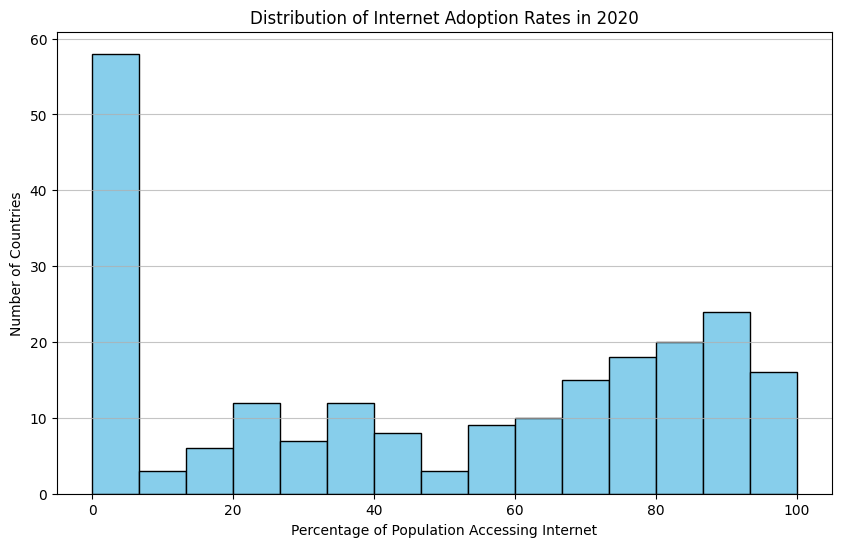

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df_2020["Internet Users(%)"], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Internet Adoption Rates in 2020')
plt.xlabel('Percentage of Population Accessing Internet')
plt.ylabel('Number of Countries')
plt.grid(axis='y', alpha=0.75)
plt.show()

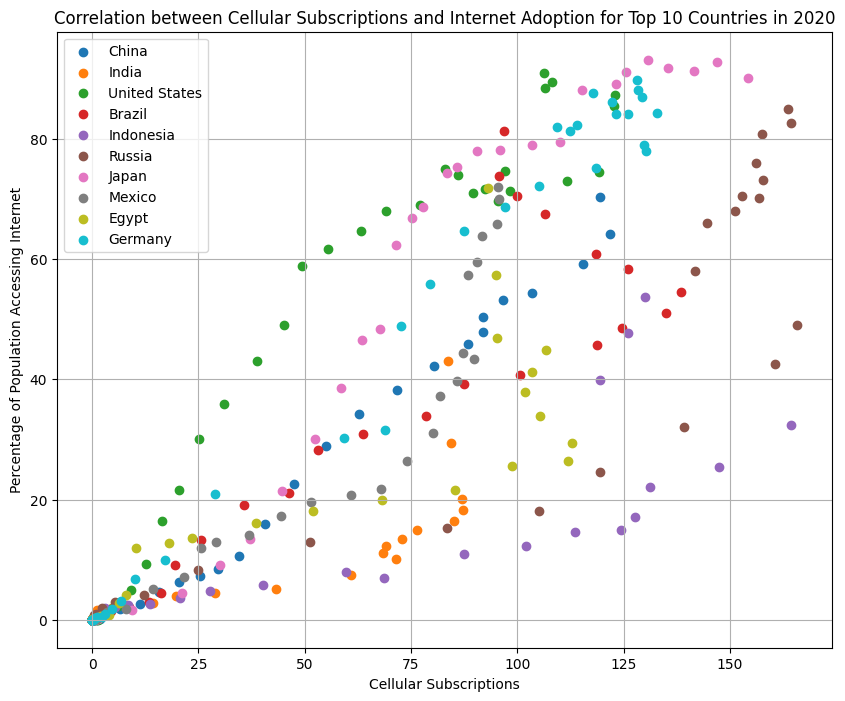

In [7]:
top_10_countries_2020 = df_2020.nlargest(10, "No. of Internet Users")

plt.figure(figsize=(10, 8))
for country in top_10_countries_2020["Entity"]:
    country_data = df[df["Entity"] == country]
    plt.scatter(country_data["Cellular Subscription"], country_data["Internet Users(%)"], label=country)

plt.title('Correlation between Cellular Subscriptions and Internet Adoption for Top 10 Countries in 2020')
plt.xlabel('Cellular Subscriptions')
plt.ylabel('Percentage of Population Accessing Internet')
plt.legend()
plt.grid(True)
plt.show()

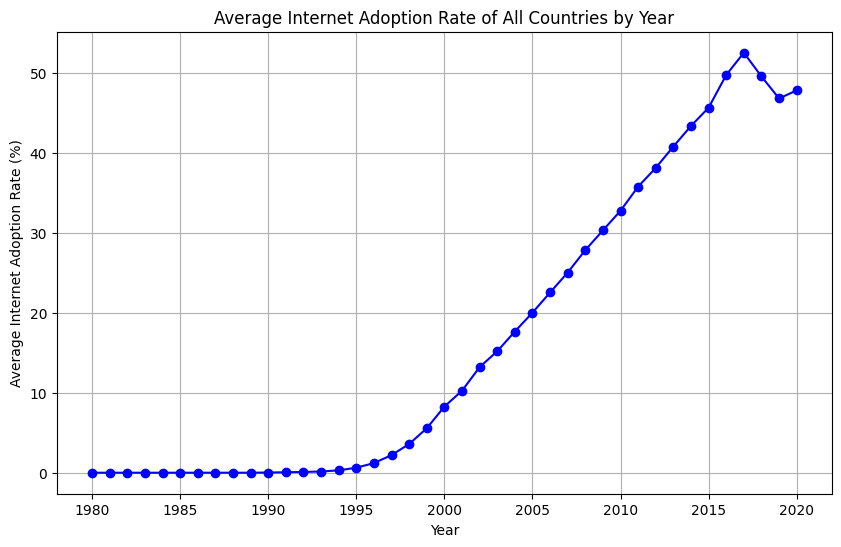

In [8]:
average_by_year = df.groupby("Year")["Internet Users(%)"].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(average_by_year["Year"], average_by_year["Internet Users(%)"], color='blue', marker='o', linestyle='-')
plt.title('Average Internet Adoption Rate of All Countries by Year')
plt.xlabel('Year')
plt.ylabel('Average Internet Adoption Rate (%)')
plt.grid(True)
plt.show()

c:\Users\ice\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


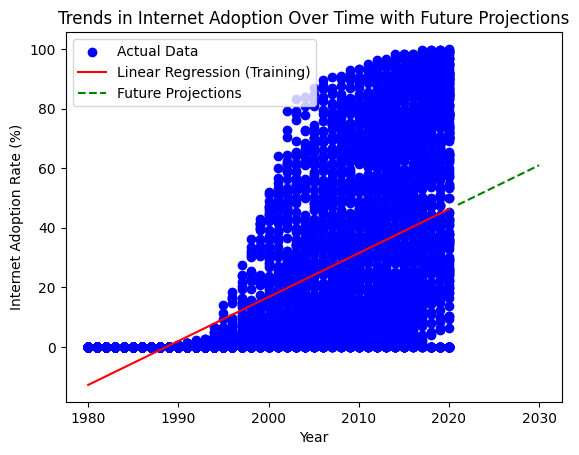

In [9]:
selected_columns = ["Year", "Internet Users(%)"]
df_selected = df[selected_columns]

df_selected = df_selected.dropna()

X = df_selected[["Year"]]
y = df_selected["Internet Users(%)"]

model = LinearRegression()

model.fit(X, y)

future_years = np.arange(2021, 2031).reshape(-1, 1)

future_predictions = model.predict(future_years)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression (Training)')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Future Projections')
plt.title('Trends in Internet Adoption Over Time with Future Projections')
plt.xlabel('Year')
plt.ylabel('Internet Adoption Rate (%)')
plt.legend()
plt.show()

c:\Users\ice\scoop\apps\python\current\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


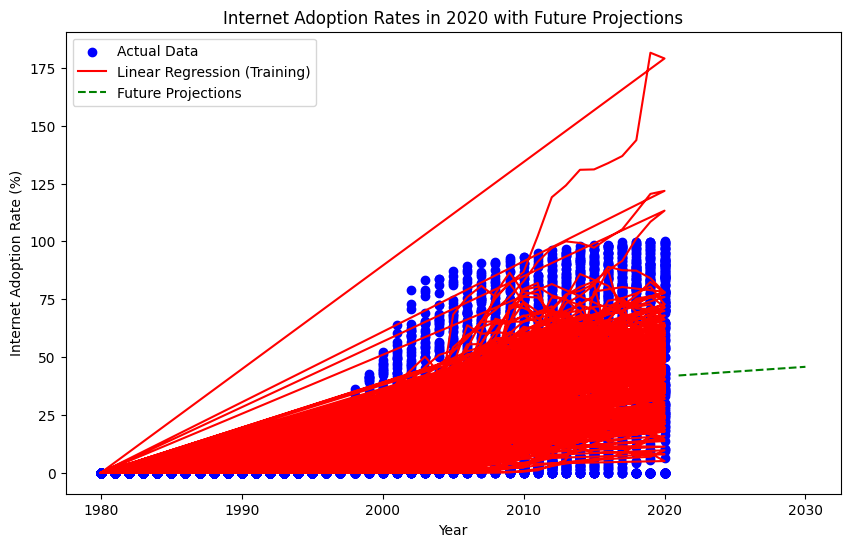

In [10]:

selected_columns = ["Cellular Subscription", "No. of Internet Users", "Internet Users(%)"]
df_selected = df[selected_columns]

df_selected = df_selected.dropna()

X = df_selected[["Cellular Subscription", "No. of Internet Users"]]
y = df_selected["Internet Users(%)"]

model = LinearRegression()

model.fit(X, y)

future_data = [[future_mobile_subscriptions, future_internet_users] for future_mobile_subscriptions, future_internet_users in zip(range(101, 111), range(1001, 1011))]
future_predictions = model.predict(future_data)

future_projections_df = pd.DataFrame({"Year": range(2021, 2031), "Predicted Internet Users(%)": future_predictions})

plt.figure(figsize=(10, 6))
plt.scatter(df["Year"], df["Internet Users(%)"], color='blue', label='Actual Data')
plt.plot(df["Year"], model.predict(X), color='red', label='Linear Regression (Training)')
plt.plot(future_projections_df["Year"], future_projections_df["Predicted Internet Users(%)"], color='green', linestyle='--', label='Future Projections')
plt.title('Internet Adoption Rates in 2020 with Future Projections')
plt.xlabel('Year')
plt.ylabel('Internet Adoption Rate (%)')
plt.legend()
plt.show()


Correlation between Cellular Subscriptions and Internet Adoption: 0.8213565856275412
Model Coefficients: [4.16255852e-01 6.33893624e-08]


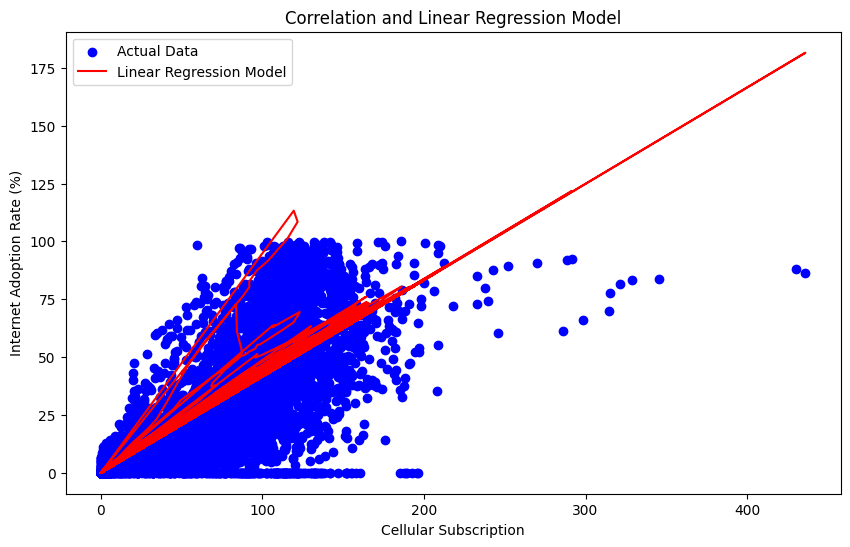

In [11]:


selected_columns = ["Cellular Subscription", "No. of Internet Users", "Internet Users(%)"]
df_selected = df[selected_columns]

df_selected = df_selected.dropna()

X = df_selected[["Cellular Subscription", "No. of Internet Users"]]
y = df_selected["Internet Users(%)"]

model = LinearRegression()

model.fit(X, y)

correlation = df_selected["Cellular Subscription"].corr(df_selected["Internet Users(%)"])
coefficients = model.coef_

print(f"Correlation between Cellular Subscriptions and Internet Adoption: {correlation}")
print(f"Model Coefficients: {coefficients}")

plt.figure(figsize=(10, 6))
plt.scatter(X["Cellular Subscription"], y, color='blue', label='Actual Data')
plt.plot(X["Cellular Subscription"], model.predict(X), color='red', label='Linear Regression Model')
plt.title('Correlation and Linear Regression Model')
plt.xlabel('Cellular Subscription')
plt.ylabel('Internet Adoption Rate (%)')
plt.legend()
plt.show()
